## 1. Regularization với Ridge, Lasso, và ElasticNet

### 1.1. Load dữ liệu và import thư viện

Ở phần này ta sẽ sử dụng tập dữ liệu `Boston.csv` được lấy từ [Kaggle](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices). Tâp dữ liệu này gồm một số thuộc tính sau: 

<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [248]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [249]:
## Load dữ liệu
boston = pd.read_csv("./data/Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1.2. Chọn `medv` là output

In [250]:
# Chọn medv là output
y = boston['medv']

# Chọn các biến còn lại là input
X = boston.drop(['medv'], axis=1)



<Axes: >

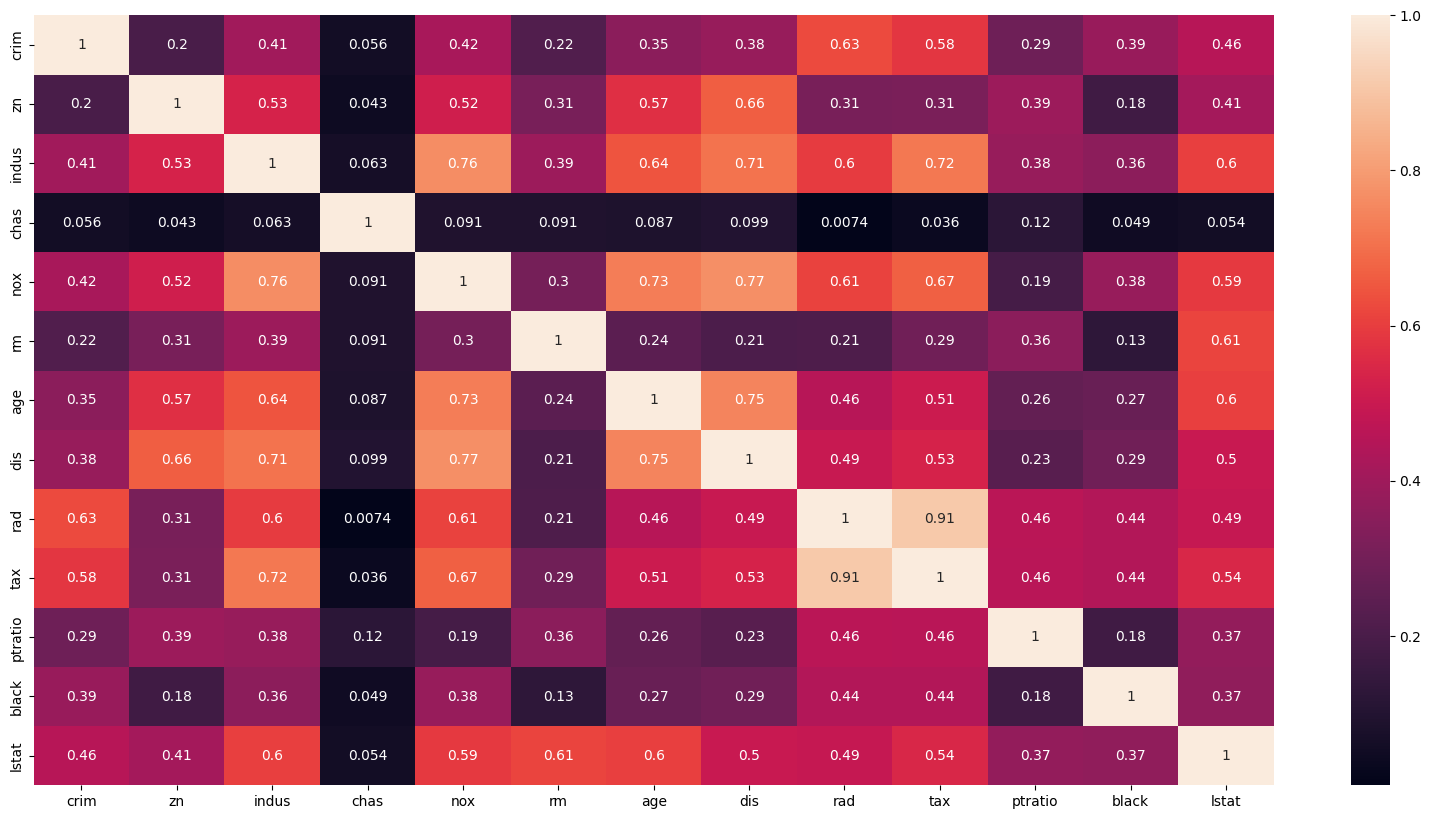

In [251]:
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr().abs(),  annot=True)

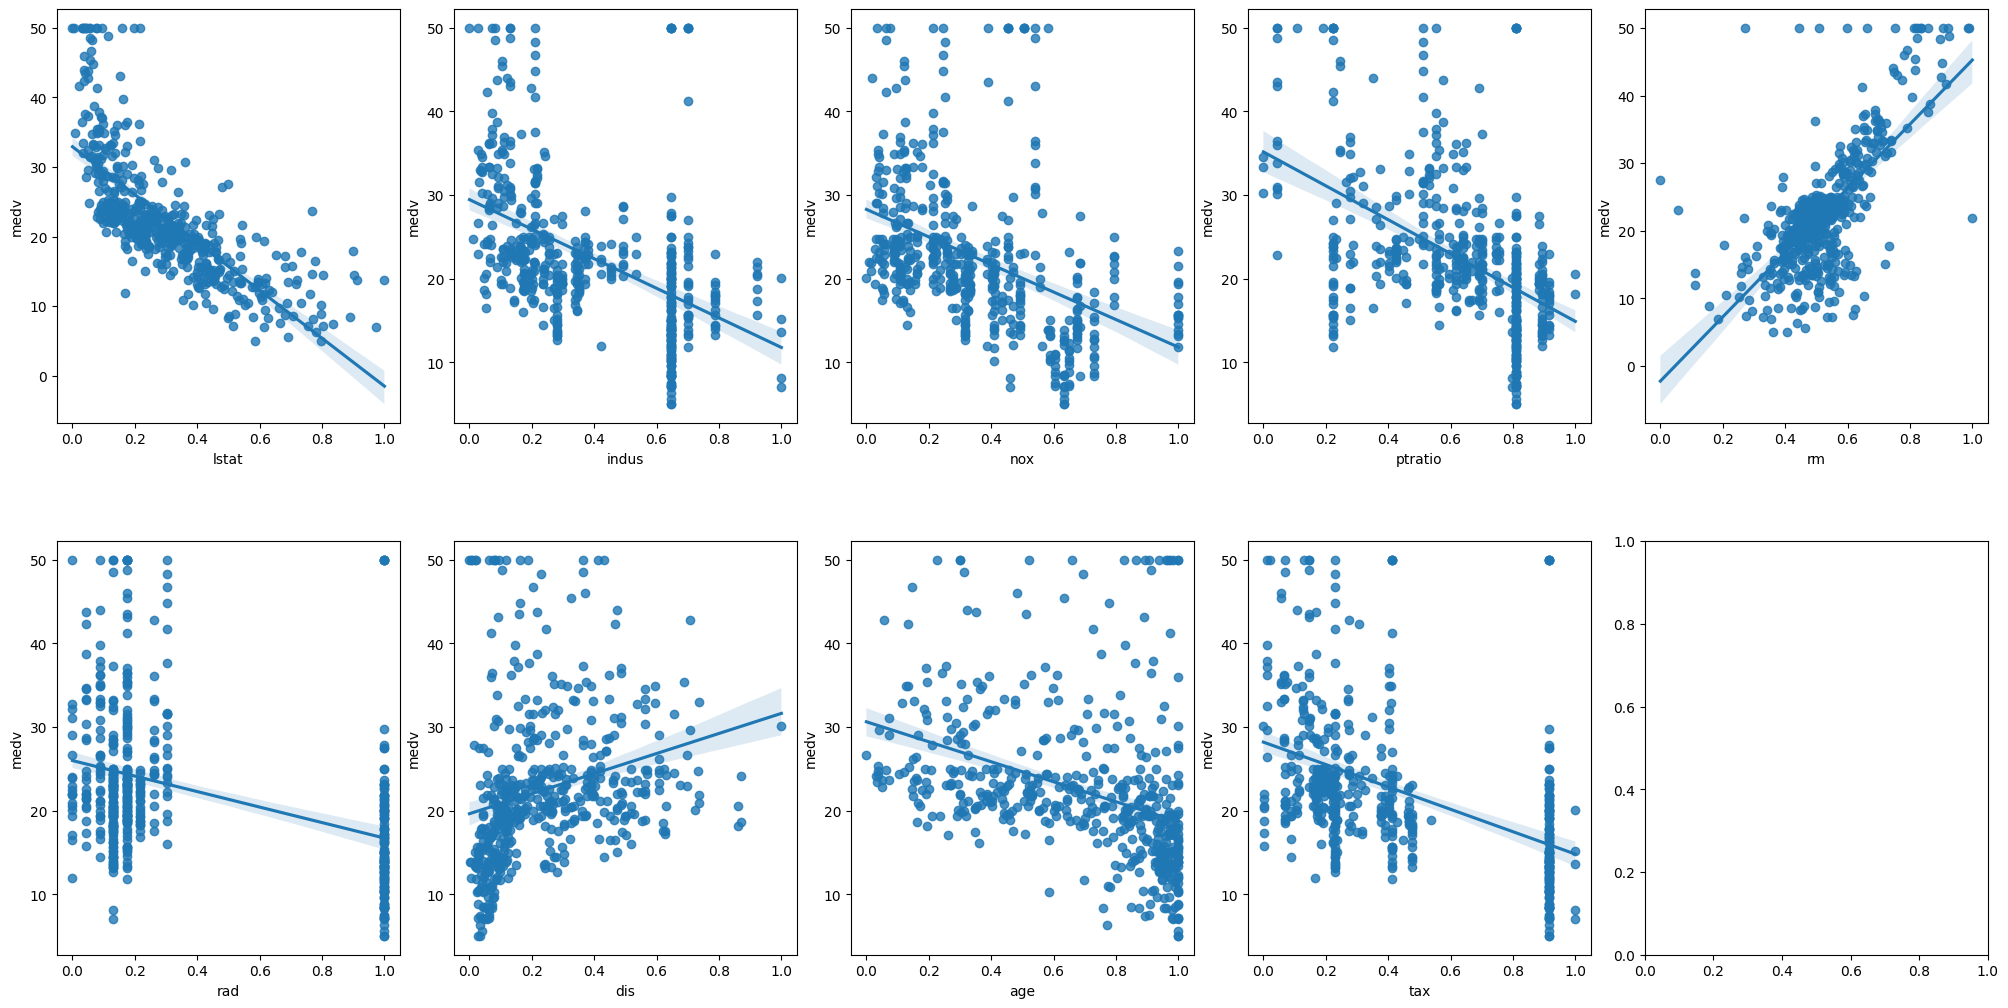

In [252]:


min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'rad', 'dis', 'age', 'tax']
x = boston.loc[:,column_sels]
y = boston['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [253]:
#boston = boston.drop(['tax'], axis=1)
#boston = boston.drop(['tax', 'rad'], axis=1)

In [254]:
# Chọn các biến còn lại là input
X = boston.drop(['medv'], axis=1)

# Chuẩn hóa (normalize) input theo chuẩn `l2`
X_norm = preprocessing.normalize(X, norm = 'l2')

### 1.3. Tách dữ liệu thành train và test set

Tách dữ liệu thành train và test set với tỷ lệ 80/20 với `random_state = 1`.

In [255]:

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 1)

### 1.4. Áp dung mô hình Linear Regression dùng thư viện scikit-learn

In [256]:

# Khởi tạo một Linear Regression model
lr = LinearRegression()

# Fit model trên train data
lr.fit(X_train, y_train)

# Predict trên test data
y_test_pred = lr.predict(X_test)

### 3.5. Tính MSE

In [257]:
# Dùng hàm mean_squared_error để tính MSE trên test data
mse = mean_squared_error(y_test, y_test_pred)

# In ra MSE value
print ("Test MSE: ", mse)

Test MSE:  22.185242671499044


### 1.6. In ra các hệ số của Linear Regression model

In [258]:
# Tạo một dictionary cho các coefficient với tên biến là các key
lr_coef = dict(zip(X.columns, np.transpose(lr.coef_)))

# Linear regression coefficients
lr_x = list(lr_coef.keys())
lr_y = list(lr_coef.values())

### 1.7. Dùng mô hình Ridge Linear Regression

In [259]:
# Tạo một Ridge Regression model với alpha = 0.01
ridge_reg = Ridge(alpha = 0.01)

# Fit mô hình trên train data
ridge_reg.fit(X_train, y_train)

# Predict trên test data
y_test_pred = ridge_reg.predict(X_test)

### 1.8. Tính MSE với Ridge regularization

In [260]:
# Tính Test MSE
mse_ridge = mean_squared_error(y_test, y_test_pred)

# In ra Test MSE
print ("Ridge Test MSE: ", mse_ridge)

Ridge Test MSE:  43.87851362974306


### 1.9. In ra các hệ số của Ridge Regression model

In [261]:
# Tạo một dictionary cho các coefficient với tên biến là các key
ridge_coef = dict(zip(X.columns, np.transpose(ridge_reg.coef_)))
ridge_coef

# Lasso regularisation coefficients
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())

print(ridge_x)
print(ridge_y)

['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
[-81.57213143815359, 27.637555051004245, -23.77174062851537, 19.261702126514244, 2.1272138792689335, 136.5967534070625, 18.790422648454655, -105.92958161295338, 22.54514578259104, -29.550087045873887, -176.9670128982482, -6.090720801384726, -355.30507073558]


### 1.10. Dùng mô hình Lasso Regression

In [262]:
# Tạo một Ridge Regression model với alpha = 0.01
lasso_reg = Lasso(0.01)

# Fit mô hình trên train data
lasso_reg.fit(X_train, y_train)

# Predict trên test data
y_test_pred = lasso_reg.predict(X_test)

### 1.11. Tính MSE với Lasso regularization

In [263]:
# Tính Test MSE
mse_lasso = mean_squared_error(y_test, y_test_pred)

# In ra Test MSE
print ("Lasso Test MSE: ", mse_lasso)

Lasso Test MSE:  48.065737076551216


### 1.12. In ra các hệ số của Lasso Regression model

In [264]:
# Tạo một dictionary cho các coefficient với tên biến là các key
lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 
lasso_coef

# Lasso regularisation coefficients
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())

### 1.13. Dùng mô hình ElasticNet Regression

In [265]:
# Tạo một ElasticNet Regression model với alpha = 0.01, l1_ratio = 0.5
elasticnet_reg = ElasticNet( alpha = 0.01, l1_ratio = 0.5)

# Fit mô hình trên train data
elasticnet_reg.fit(X_train, y_train)

# Predict trên test data
y_test_pred = elasticnet_reg.predict(X_test)

### 1.14. Tính MSE với ElasticNet regularization

In [266]:
# Tính Test MSE
mse_elasticnet = mean_squared_error(y_test, y_test_pred)

# In ra Test MSE
print ("Lasso Test MSE: ", lasso_coef)

Lasso Test MSE:  {'crim': -0.0, 'zn': 23.694339592079995, 'indus': -0.0, 'chas': 0.0, 'nox': 0.0, 'rm': 0.0, 'age': 16.960768770686567, 'dis': -0.0, 'rad': 0.0, 'tax': -19.476656493087294, 'ptratio': -0.0, 'black': -0.0, 'lstat': -379.4555837215245}


### 1.16. In ra các hệ số của ElasticNet Regression model

In [267]:
# Tạo một dictionary cho các coefficient với tên biến là các key
elasticnet_coef = dict(zip(X.columns, np.transpose(elasticnet_reg.coef_))) 
elasticnet_coef

# ElasticNet regularisation coefficients
elasticnet_x = list(elasticnet_coef.keys())
elasticnet_y = list(elasticnet_coef.values())

### 1.13. Vẽ biểu đồ so sánh hệ số của các mô hình

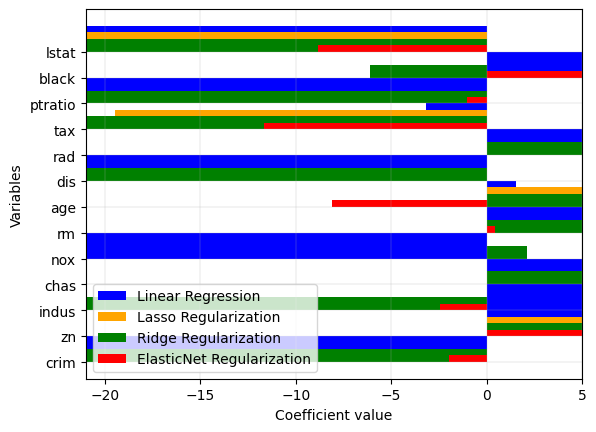

In [268]:
plt.rcdefaults()
plt.barh(lr_x, lr_y, 1.0, align = 'edge', color = "blue", label = "Linear Regression")
plt.barh(lasso_x, lasso_y, 0.75 ,align = 'edge', color = "orange", label = "Lasso Regularization")
plt.barh(ridge_x, ridge_y, 0.5 ,align = 'edge', color = "green", label = "Ridge Regularization")
plt.barh(elasticnet_x, elasticnet_y, 0.25 ,align = 'edge', color = "red", label = "ElasticNet Regularization")
plt.grid(linewidth = 0.2)
plt.xlabel("Coefficient value")
plt.ylabel("Variables")
plt.legend(loc = 'best')
plt.xlim(-21, 5)
plt.show()

## 2. Model selection cho Ridge Regression dùng phương pháp holdout

![holdout_model_selection](./image/holdout_model_selection.JPG)

### 2.1. Chia dữ liệu

In [269]:
# Chia dữ liệu boston thành 2 tập train_val và test set với tỷ lệ 80/20
boston_train_val, boston_test = train_test_split(boston, test_size = 0.2, random_state = 1)

# Tiếp theo, chia tập train_val thành 2 tập train và validation set với tỷ lệ 75/25
boston_train, boston_val = train_test_split(boston_train_val, test_size = 0.25, random_state = 1)

features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

X_train = boston_train[features]
y_train = boston_train[['medv']]

X_val = boston_val[features]
y_val = boston_val[['medv']]

X_test = boston_test[features]
y_test = boston_test[['medv']]



### 2.2. Huấn luyện mô hình với các giá trị tham số `alpha` khác nhau

In [270]:
# Create three lists for train, validation, and test MSE
train_mse = []
val_mse = []
test_mse = []

# List of hyper-parameter values 
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the alpha values
for alpha in alphas:
    # Tạo mô hình Ridge regression với tham số alpha
    ridge_reg = Ridge(alpha)

    # Fit mô hình trên train data
    ridge_reg.fit(X_train, y_train)
    
    # Predict trên train set 
    y_train_pred = ridge_reg.predict(X_train)
    
    # Predict trên validation set 
    y_val_pred = ridge_reg.predict(X_val)

    # Predict trên test set 
    y_test_pred = ridge_reg.predict(X_test)
    
    # Tính train, validation, và test MSE
    mse_train = mean_squared_error(y_train, y_train_pred) 
    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Thêm các MSE vào các list tương ứng
    train_mse.append(mse_train)
    val_mse.append(mse_val)
    test_mse.append(mse_test)
    
    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:7} | train mse: {:5} | val mse: {:5} | test mse: {:5}'.
          format(alpha, round(mse_train, 2), round(mse_val, 2), round(mse_test, 2)))

alpha:  0.0001 | train mse:  22.7 | val mse: 20.84 | test mse:  25.9
alpha:   0.001 | train mse:  22.7 | val mse: 20.84 | test mse: 25.89
alpha:    0.01 | train mse:  22.7 | val mse: 20.83 | test mse: 25.88
alpha:     0.1 | train mse: 22.71 | val mse: 20.77 | test mse: 25.76
alpha:     0.0 | train mse:  22.7 | val mse: 20.84 | test mse:  25.9
alpha:       1 | train mse: 23.08 | val mse:  20.8 | test mse: 25.53
alpha:      10 | train mse: 23.94 | val mse: 21.82 | test mse: 26.44
alpha:   100.0 | train mse:  24.7 | val mse: 24.56 | test mse: 29.91
alpha:  1000.0 | train mse: 27.57 | val mse: 28.17 | test mse: 36.28
alpha: 10000.0 | train mse: 38.57 | val mse: 35.32 | test mse: 51.75


### 2.3. Chọn giá trị `alpha` cho kết quả tốt nhất trên validation set

In [271]:
# Chọn giá trị alpha (hyper-parameter), cho val mse nhỏ nhất trên validation data 
best_alpha = alphas[val_mse.index(min(val_mse))]

# In ra best alpha (hyper-parameter)
print(f'The best alpha (hyper-parameter) value, alpha = {best_alpha}')

The best alpha (hyper-parameter) value, alpha = 0.1


### 2.4. Vẽ biểu đồ train/val/test MSE theo alpha

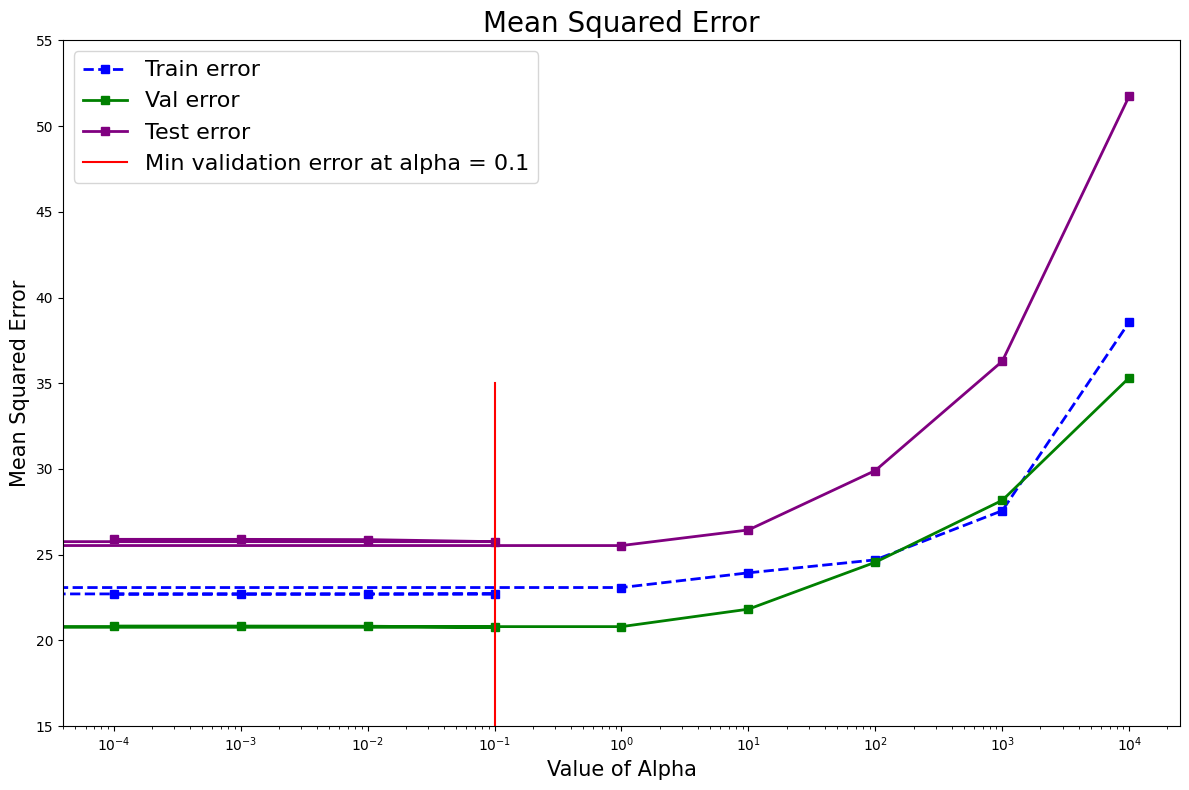

In [272]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train MSE theo các giá trị alpha
ax.plot(alphas, train_mse, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation MSE theo các giá trị alpha
ax.plot(alphas, val_mse, 's-', label = 'Val error',color ='green', linewidth = 2)

# Vẽ biểu đồ test MSE theo các giá trị alpha
ax.plot(alphas, test_mse, 's-', label = 'Test error',color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best alpha
ax.axvline(best_alpha, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_alpha}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.set_ylim([15, 55])
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show()

## 3. Model selection cho Lasso Regression dùng phương pháp holdout

### 3.1. Huấn luyện mô hình với các giá trị tham số `alpha` khác nhau

In [273]:
# Create three lists for train, validation, and test MSE
train_mse = []
val_mse = []
test_mse = []

# List of hyper-parameter values 
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the alpha values
for alpha in alphas:
    # Tạo một Lasso regression với tham số alpha
    lasso_reg = Lasso(alpha)

    # Fit mô hình trên train data
    lasso_reg.fit(X_train, y_train)
    
    # Predict trên train set 
    y_train_pred = lasso_reg.predict(X_train)
    
    # Predict trên validation set 
    y_val_pred = lasso_reg.predict(X_val)

    # Predict trên test set 
    y_test_pred = lasso_reg.predict(X_test)
    
    # Tính train, validation, và test MSE
    mse_train = mean_squared_error(y_train, y_train_pred) 
    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Thêm các MSE vào các list tương ứng
    train_mse.append(mse_train)
    val_mse.append(mse_val)
    test_mse.append(mse_test)
    
    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:7} | train mse: {:5} | val mse: {:5} | test mse: {:5}'.
          format(alpha, round(mse_train, 2), round(mse_val, 2), round(mse_test, 2)))

alpha:  0.0001 | train mse:  22.7 | val mse: 20.84 | test mse: 25.89
alpha:   0.001 | train mse:  22.7 | val mse: 20.83 | test mse: 25.88
alpha:    0.01 | train mse: 22.74 | val mse:  20.8 | test mse:  25.8
alpha:     0.1 | train mse: 24.31 | val mse: 22.46 | test mse: 27.21
alpha:       1 | train mse: 26.74 | val mse: 28.46 | test mse: 35.69
alpha:      10 | train mse: 37.65 | val mse: 36.09 | test mse:  49.9
alpha:   100.0 | train mse: 65.67 | val mse: 55.55 | test mse: 76.21
alpha:  1000.0 | train mse: 82.86 | val mse: 74.66 | test mse: 98.84
alpha: 10000.0 | train mse: 82.86 | val mse: 74.66 | test mse: 98.84


### 3.2. Chọn giá trị alpha cho kết quả tốt nhất trên validation set

In [274]:
# Chọn giá trị alpha (hyper-parameter), cho val mse nhỏ nhất trên validation data 
best_alpha = alphas[val_mse.index(min(val_mse))]

# In ra best alpha (hyper-parameter)
print(f'The best alpha (hyper-parameter) value, alpha = {best_alpha}')

The best alpha (hyper-parameter) value, alpha = 0.01


### 3.3. Vẽ biểu đồ train/val/test MSE theo alpha

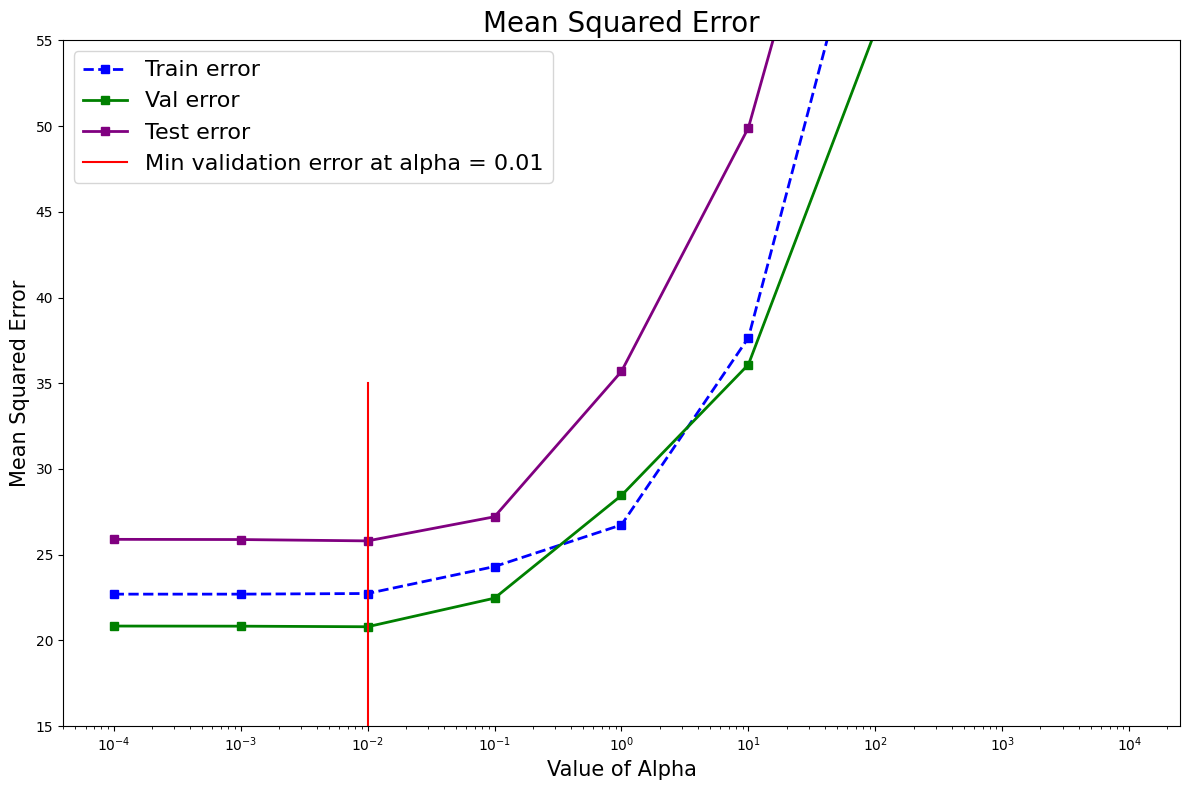

In [275]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train MSE theo các giá trị alpha
ax.plot(alphas, train_mse, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# Vẽ biểu đồ validation MSE theo các giá trị alpha
ax.plot(alphas, val_mse, 's-', label = 'Val error',color ='green', linewidth = 2)

# Vẽ biểu đồ test MSE theo các giá trị alpha
ax.plot(alphas, test_mse, 's-', label = 'Test error',color ='purple', linewidth = 2)

# Vẽ đường thẳng đứng ứng với best alpha
ax.axvline(best_alpha, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_alpha}')

ax.set_xlabel('Value of Alpha', fontsize = 15)
ax.set_ylabel('Mean Squared Error',fontsize = 15)
ax.set_ylim([15, 55])
ax.legend(loc = 'upper left', fontsize = 16)
ax.set_title('Mean Squared Error', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show()

## 4. Model selection cho Ridge Regression dùng phương pháp cross validation

### 4.1. Chia dữ liệu

In [276]:
# Chia dữ liệu boston thành train và test set theo tỷ lệ 80/20
boston_train, boston_test = train_test_split(boston, test_size = 0.2, random_state = 1)

features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'rad', 'ptratio', 'black', 'lstat']

X_train = boston_train[features]
y_train = boston_train[['medv']]

X_test = boston_test[features]
y_test = boston_test[['medv']]

### 4.2. Dùng `RidgeCV` và `LassoCV` cho model selection

![k-folds cs](./image/cross_val.png)

*<strong>RidgeCV </strong>là một công cụ trong thư viện scikit-learn dùng để thực hiện hồi quy Ridge với validation các tham số alpha bằng cách sử dụng kỹ thuật cross-validation.<br>
*<strong>LassoCV </strong>là một công cụ trong thư viện scikit-learn cũng sử dụng cross-validation để tìm giá trị tối ưu của tham số alpha trong hồi quy Lasso.

In [277]:
alphas = (0.001, 0.01, 0.1, 1, 10, 100, 1000)

linear_reg = LinearRegression().fit(X_train, y_train)
linear_score = linear_reg.score(X_test, y_test)
print('R^2 score for original least squares (OLS) model: {}\n'.format(linear_score))

# Dùng k-fold cross validation cho Ridge và Lasso với các giá trị alpha ở trên và cv là k
k = 5
ridge_reg = RidgeCV(alphas = alphas, cv = k).fit(X_train, y_train)
lasso_reg = LassoCV(alphas = alphas, cv = k).fit(X_train, y_train)
   
ridge_alpha = ridge_reg.alpha_
ridge_score = ridge_reg.score(X_test, y_test)
print('Best alpha for ridge: {}'.format(ridge_alpha))
print('R^2 score for Ridge with alpha = {} is {}\n'.format(ridge_alpha, ridge_score))

lasso_alpha = lasso_reg.alpha_
lasso_score = lasso_reg.score(X_test, y_test)
print('Best alpha for lasso: {}'.format(lasso_alpha))
print('R squared score for Lasso with alpha = {} is {}'.format(lasso_alpha, lasso_score))

R^2 score for original least squares (OLS) model: 0.7634174432138475

Best alpha for ridge: 0.01
R^2 score for Ridge with alpha = 0.01 is 0.7635045352106551

Best alpha for lasso: 0.001
R squared score for Lasso with alpha = 0.001 is 0.7635005364218072


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 4.3. Dùng `KFold` cho model selection

In [278]:
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
label = ['medv']

X = boston[features]
y = pd.DataFrame(boston[label])

alphas = (0.001, 0.01, 0.1, 1, 10, 100, 1000)

K = 10
kf = KFold(n_splits = K, shuffle = True, random_state = 1)

for alpha in alphas:
    train_mses = []
    test_mses = []
    r2_score_tests = []
    for train_index, test_index in kf.split(X, y):
        
        # split data theo train_index và test_index
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Tạo model theo alpha
        lasso_reg = Lasso(alpha, fit_intercept = True, random_state = 1)
        
        # Fit the model trên train set
        lasso_reg.fit(X_train, y_train)
        
        # Predict trên train và test set
        y_train_pred = lasso_reg.predict(X_train)
        y_test_pred = lasso_reg.predict(X_test)
        
        # Tính train và test mse
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        r2_score_test = r2_score(y_test, y_test_pred)
        
        # Thêm train và test mse vào các list tương ứng
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        r2_score_tests.append(r2_score_test)
    
    # In ra train, validation, và test MSE theo alpha
    print('alpha: {:6} | mean(train_mse): {:6} | mean(test_mse): {:6} | r2_score: {:6}'.
          format(alpha, round(train_mse, 2), round(test_mse, 2), round(r2_score_test, 2)))

alpha:  0.001 | mean(train_mse):  22.86 | mean(test_mse):  13.74 | r2_score:   0.76
alpha:   0.01 | mean(train_mse):  22.89 | mean(test_mse):  13.82 | r2_score:   0.75
alpha:    0.1 | mean(train_mse):  23.97 | mean(test_mse):  15.12 | r2_score:   0.73
alpha:      1 | mean(train_mse):  27.62 | mean(test_mse):  16.07 | r2_score:   0.71
alpha:     10 | mean(train_mse):  41.69 | mean(test_mse):  23.39 | r2_score:   0.58
alpha:    100 | mean(train_mse):  67.82 | mean(test_mse):  41.93 | r2_score:   0.26
alpha:   1000 | mean(train_mse):  86.98 | mean(test_mse):  61.56 | r2_score:  -0.09
